* Link: https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

Đọc file:


In [2]:
data = pd.read_csv('Student_Performance.csv', nrows = 300)
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
295,2,99,Yes,9,5,76.0
296,6,71,No,5,2,57.0
297,7,90,Yes,8,9,82.0
298,2,60,No,7,3,35.0


Variables:
+ **Hours Studied**: The total number of hours spent studying by each student.
+ **Previous Scores**: The scores obtained by students in previous tests.
+ **Extracurricular Activities**: Whether the student participates in extracurricular activities (Yes or No).
+ **Sleep Hours**: The average number of hours of sleep the student had per day.
+ **Sample Question Papers Practiced**: The number of sample question papers the student practiced.

Target Variable:
+ **Performance Index**: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.

**I.Processing data**

1. Cleanning data 


In [3]:
data_clean = data.copy()

In [4]:
#Miêu tả số lượng, trung bình, phương sai, độ lêch chuẩn, Q1, Q3, giá trị lớn nhất, giá trị nhỏ nhất, trung vị của các cột
data_clean.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,300.00000,300.000000,300.000000,300.000000,300.000000
mean,4.92000,69.833333,6.410000,4.276667,55.136667
std,2.64896,16.947259,1.750843,2.771110,19.090473
min,1.00000,40.000000,4.000000,0.000000,15.000000
25%,3.00000,55.000000,5.000000,2.000000,40.750000
50%,5.00000,70.000000,6.000000,4.000000,55.000000
75%,7.00000,84.250000,8.000000,6.250000,71.000000
max,9.00000,99.000000,9.000000,9.000000,100.000000


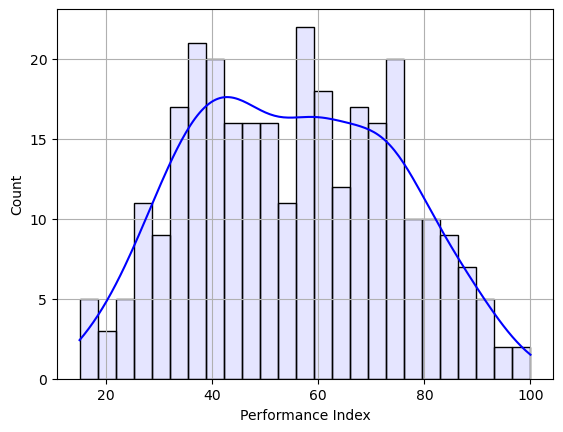

In [5]:
#Vẽ biểu đồ histplot miêu tả sự phân bố dữ liệu của cột Performance Index
sns.histplot(data = data_clean, x = "Performance Index", bins=25, color = "blue", kde = True, line_kws = {'color':'red'}, alpha = 0.1)
plt.grid()

In [7]:
#Tính tổng số phần tử là NaN của mỗi cột
data_clean.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

2.Encode Data

In [9]:
data_encode = data_clean.copy()

In [10]:
#Tìm các phần tử là duy nhất của các cột fuel_type, seller_type, transmission(là các cột cần mã hóa về dạng số)
lst_unique = []
lst_column_encoded = ["Extracurricular Activities"]
for i in lst_column_encoded:
    lst_unique.append(data_encode[i].unique().tolist())
lst_unique

[['Yes', 'No']]

In [11]:
#Tiến hành mã hóa các cột
data_encode["Extracurricular Activities"] = [0 if i == "No" else 1 for i in data_encode["Extracurricular Activities"]]
data_encode

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
295,2,99,1,9,5,76.0
296,6,71,0,5,2,57.0
297,7,90,1,8,9,82.0
298,2,60,0,7,3,35.0


**II.Đánh giá mức độ tương quan**

In [12]:
#Tính mức độ tương quan dữ liệu giữa các cột tron dữ liệu
cor_matrix = data_encode.corr()
cor_matrix

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,0.010728,-0.036826,-0.021749,-0.066684,0.406092
Previous Scores,0.010728,1.000000,-0.044616,0.059795,0.033673,0.911512
Extracurricular Activities,-0.036826,-0.044616,1.000000,0.074225,-0.040708,-0.037863
Sleep Hours,-0.021749,0.059795,0.074225,1.000000,-0.093080,0.083170
Sample Question Papers Practiced,-0.066684,0.033673,-0.040708,-0.093080,1.000000,0.031020
Performance Index,0.406092,0.911512,-0.037863,0.083170,0.031020,1.000000


<Axes: >

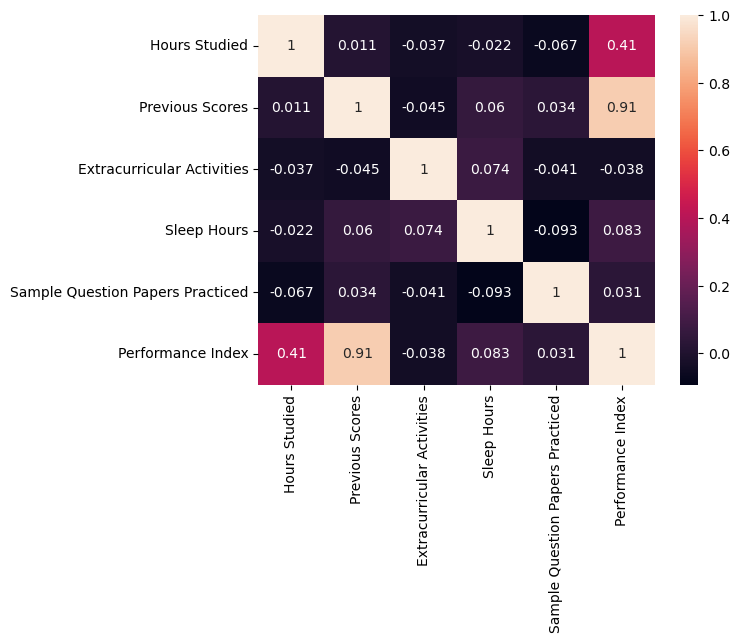

In [13]:
sns.heatmap(cor_matrix, annot = True)

Nhận xét:
+ Các cột "Hours Studied", "Previous Scores" có hệ số tương quan tương đối cao với cột "Performance Index"
+ Các cột "Extracurricular Activities", "Sleep Hours", "Sample Question Papers Practiced" có hệ số tương quan thấp, cần phải loại bỏ

**III.Linear Regression**

In [14]:
data_linear_regression = data_encode.copy()
data_linear_regression

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
295,2,99,1,9,5,76.0
296,6,71,0,5,2,57.0
297,7,90,1,8,9,82.0
298,2,60,0,7,3,35.0


In [15]:
X = data_linear_regression[["Previous Scores", "Hours Studied"]].to_numpy()
y = data_linear_regression["Performance Index"].to_numpy()

In [16]:
#Tạo hàm phân tách dữ liệu thành 2 phần là tập train và tập test
def data_train_test_split(data1, data2, train_size):
    x_train_size = int(np.ceil(train_size * len(data1)))
    y_train_size = int(np.ceil(train_size * len(data2)))
    x_train = data1[0:x_train_size]
    x_test = data1[x_train_size:len(data1)]
    y_train = np.array([data2[0:y_train_size]])
    y_test = np.array([data2[y_train_size:len(data2)]])
    return x_train, y_train, x_test, y_test

#### Công thức tính W:
$$\omega=(X^T.X)^{-1}.X^T.y $$

In [17]:
#Tạo hàm tính toán hệ số w
def linear_regression(x_arr, y_label):
    arr_ones = np.ones((x_arr.shape[0], 1))
    xbar = np.hstack((arr_ones, x_arr))
    y_arr = y_label.T
    A = np.dot(xbar.T, xbar)
    B = np.dot(xbar.T, y_arr)
    w = np.dot(np.linalg.pinv(A), B)
    return w

$$y=w_0+w_1.x_1+w_2.x_2+...+w_n.x_n $$

In [18]:
#Tạo hàm dự đoán cho 1 tập dữ liệu bất kỳ
def predict_regression(x_arr_test, w_coffecient):
    arr_ones = np.ones((x_arr_test.shape[0], 1))
    xbar_test = np.hstack((arr_ones, x_arr_test))
    y_predict = np.dot(xbar_test, w_coffecient)
    return y_predict

In [19]:
x_train, y_train, x_test, y_test = data_train_test_split(X, y, 0.8)
w = linear_regression(x_train, y_train)
print("Hệ số w cần tìm:")
for i in range(len(w)):
    print("w" + str(i) + " = " + str(w[i][0]))

Hệ số w cần tìm:
w0 = -30.340934012235834
w1 = 1.0211791194535564
w2 = 2.8695222298373153


In [63]:
ytest_pred = predict_regression(x_test, w)
ytest_pred.T

array([[65.50699156, 41.58073808, 82.28499121, 44.45026031, 48.09584306,
        60.78912622, 27.67226067, 77.95515613, 45.47143943, 61.03424483,
        48.7800954 , 45.91057317, 58.94078311, 52.18055953, 18.48164859,
        20.13597657, 81.84585748, 42.84703581, 71.63406628, 74.69760364,
        86.95175307, 27.28423041, 61.42227509, 49.80127452, 42.79593233,
        53.44685726, 50.1382013 , 56.26527601, 46.29860342, 70.17375343,
        45.47143943, 25.24187217, 47.07466394, 61.37117161, 36.08681223,
        50.18930477, 33.41130513, 69.00966266, 82.0398726 , 45.71655804,
        35.84169362, 62.63746933, 50.77135016, 58.30763425, 72.02209654,
        59.57393198, 30.59288637, 60.34999249, 77.32200726, 61.17715648,
        40.41664731, 84.90939483, 31.36894689, 87.58490194, 37.54712508,
        76.49484327, 59.37991685, 81.65184235, 36.66885761, 39.73239497]])

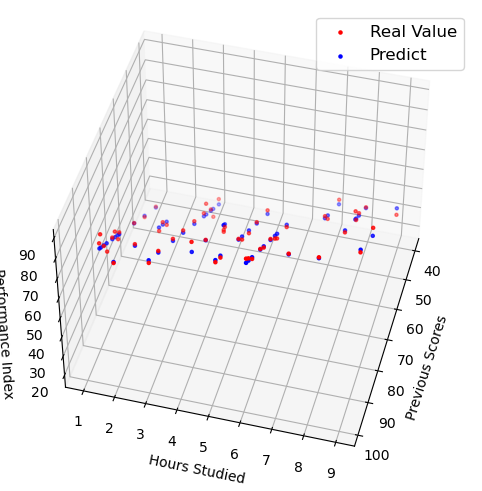

In [94]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
 
xp0, xp1 = [],[]
for x in x_test:
    xp0.append(x[0])
    xp1.append(x[1])
yp = ytest_pred

xr0, xr1 = [],[]
for x in x_test:
    xr0.append(x[0])
    xr1.append(x[1])
yr = y_test
mpl.rcParams['legend.fontsize'] = 12
 
fig = plt.figure(figsize =(10, 6))
ax = fig.add_subplot(projection ='3d')
 
ax.scatter(xr0, xr1, yr, label ='Real Value', s = 5, color="red")
ax.scatter(xp0, xp1, yp, label ='Predict', s = 5, color="blue")
ax.legend()
ax.view_init(45, 15)

ax.set_xlabel("Previous Scores")
ax.set_ylabel("Hours Studied")
ax.set_zlabel("Performance Index")
plt.show()

4.Dự đoán cho x_train

In [24]:
ytrain_pred = predict_regression(x_train, w)

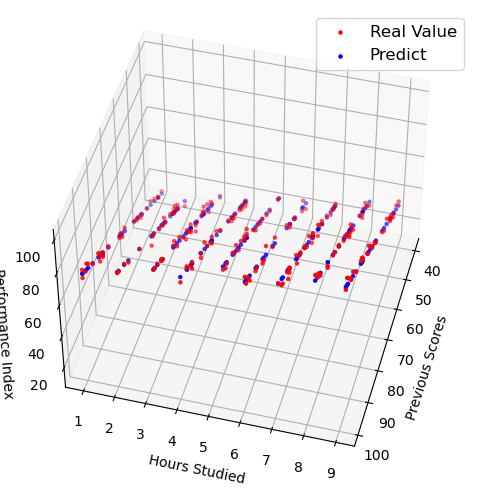

In [93]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
 
xp0, xp1 = [],[]
for x in x_train:
    xp0.append(x[0])
    xp1.append(x[1])
yp = ytrain_pred

xr0, xr1 = [],[]
for x in x_train:
    xr0.append(x[0])
    xr1.append(x[1])
yr = y_train
mpl.rcParams['legend.fontsize'] = 12
 
fig = plt.figure(figsize =(10, 6))
ax = fig.add_subplot(projection ='3d')
 
ax.scatter(xr0, xr1, yr, label ='Real Value', s = 5, color="red")
ax.scatter(xp0, xp1, yp, label ='Predict', s = 5, color="blue")
ax.legend()
ax.view_init(45, 15)

ax.set_xlabel("Previous Scores")
ax.set_ylabel("Hours Studied")
ax.set_zlabel("Performance Index")
plt.show()

5.Đánh giá sai số

<img src="https://i0.wp.com/agronomy4future.org/wp-content/uploads/2022/03/%ED%8F%89%EA%B7%A0-%EC%A0%9C%EA%B3%B1%EA%B7%BC-%EC%98%A4%EC%B0%A8-RMSE-%EB%A5%BC-%EC%97%91%EC%85%80%EA%B3%BC-R-%EC%9D%84-%EC%9D%B4%EC%9A%A9%ED%95%B4-%EC%8B%A4%EC%A0%9C%EB%A1%9C-%EA%B3%84%EC%82%B0%ED%95%B4-%EB%B3%B4%EC%9E%90-fig2-1.jpg?resize=640%2C240&ssl=1" width="200" height="50"></img>

In [28]:
#Tính sai số RMSE
def root_mean_square_error(y1, y2):
    y_error = y1 - y2
    y_error2 = y_error ** 2
    n = y_error2.shape[1]
    rmse = np.sqrt(y_error2.sum() / n)
    return rmse
    

<img src="https://media.licdn.com/dms/image/D4D12AQElnzGmdRcbWw/article-inline_image-shrink_400_744/0/1671516160761?e=1694649600&v=beta&t=q5PPfMzDTX8A1RLwUoEz1QL1izvDQGNcFy6HLTGZjdI" width="200" height="50"></img>

In [29]:
#Tính sai số MSE
def mean_square_error(y1, y2):
    y_error = y1 - y2
    y_error2 = y_error ** 2
    n = y_error2.shape[1]
    mse = y_error2.sum() / n
    return mse

<img src="https://editor.analyticsvidhya.com/uploads/42439Screenshot%202021-10-26%20at%209.34.08%20PM.png" width="200" height="50"></img>

In [30]:
#Tính sai số MAE
def mean_absolute_error(y1, y2):
    y_error = y1 - y2
    for i in range(len(y_error[0])):
        if y_error[0][i] < 0:
            y_error[0][i] = y_error[0][i] * (-1)
    n = y_error.shape[1]
    mae = y_error.sum() / n
    return mae

*5.1.Đánh giá sai số cho tập test*

In [31]:
print("Root Mean Square Error(RMSE) of test data:", root_mean_square_error(y_test, ytest_predT))
print("Mean Square Error(MSE) of test data:", mean_square_error(y_test, ytest_predT))
print("Mean Absolute Error(MAE) of test data:", mean_absolute_error(y_test, ytest_predT))

Root Mean Square Error(RMSE) of test data: 2.2128360938689227
Mean Square Error(MSE) of test data: 4.896643578329072
Mean Absolute Error(MAE) of test data: 1.7063112917620333


*5.2.Đánh giá sai số cho tập train*

In [32]:
print("Root Mean Square Error(RMSE) of train data:", root_mean_square_error(y_train, ytrain_predT))
print("Mean Square Error(MSE) of train data:", mean_square_error(y_train, ytrain_predT))
print("Mean Absolute Error(MAE) of train data:", mean_absolute_error(y_train, ytrain_predT))

Root Mean Square Error(RMSE) of train data: 2.0634345075912925
Mean Square Error(MSE) of train data: 4.257761967118521
Mean Absolute Error(MAE) of train data: 1.6140693810303397
